In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import datetime as datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#define the start and end duration of the stock data
start = datetime.datetime(2015,1,2)
end = datetime.datetime(2020,1,31)

In [3]:
FB = web.DataReader('FB','yahoo',start,end)

In [4]:
#view top 5 rows of the FB Stock dataset
FB.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,78.930000,77.699997,78.580002,78.449997,18177500,78.449997
2015-01-05,79.250000,76.860001,77.980003,77.190002,26452200,77.190002
2015-01-06,77.589996,75.360001,77.230003,76.150002,27399300,76.150002
2015-01-07,77.360001,75.820000,76.760002,76.150002,22045300,76.150002
2015-01-08,78.230003,76.080002,76.739998,78.180000,23961000,78.180000


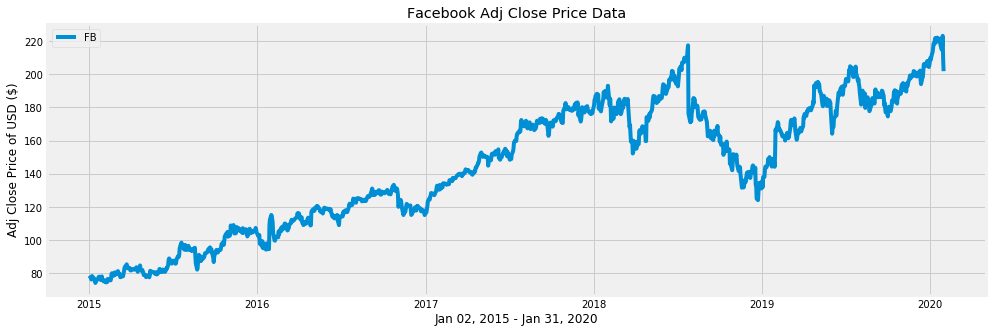

In [6]:
#visualize the data
plt.figure(figsize=(15,5))
plt.plot(FB['Adj Close'],label = 'FB')
plt.title('Facebook Adj Close Price Data')
plt.xlabel('Jan 02, 2015 - Jan 31, 2020')
plt.ylabel('Adj Close Price of USD ($)')
plt.legend(loc='upper left')
plt.show()

In [7]:
#Create the 30 days simple moving average 
SMA30 = pd.DataFrame()
SMA30['Adj Close Price']= FB['Adj Close'].rolling(30).mean()

In [8]:
#Create the 100 days simple moving average 
SMA100 = pd.DataFrame()
SMA100['Adj Close Price']= FB['Adj Close'].rolling(100).mean()

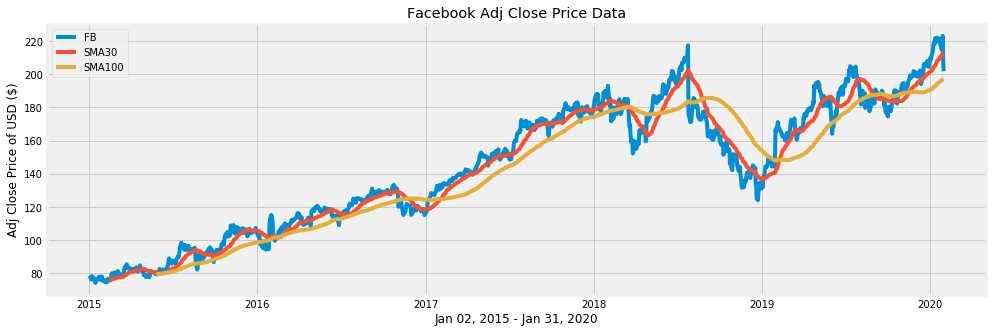

In [9]:
#visualize the data
plt.figure(figsize=(15,5))
plt.plot(FB['Adj Close'],label = 'FB')
plt.plot(SMA30['Adj Close Price'], label = 'SMA30')
plt.plot(SMA100['Adj Close Price'], label = 'SMA100')
plt.title('Facebook Adj Close Price Data')
plt.xlabel('Jan 02, 2015 - Jan 31, 2020')
plt.ylabel('Adj Close Price of USD ($)')
plt.legend(loc='upper left')
plt.show()

In [10]:
#Create a new dataframe to store all the datasets
data =pd.DataFrame()
data['FB'] = FB['Adj Close']
data['SMA30'] = SMA30['Adj Close Price']
data['SMA100'] = SMA100['Adj Close Price']
data.tail(5)

,FB,SMA30,SMA100
Date,,,
2020-01-27,214.869995,211.197666,196.2555
2020-01-28,217.789993,211.899000,196.5620
2020-01-29,223.229996,212.869666,196.8853
2020-01-30,209.529999,213.256666,197.1057
2020-01-31,201.910004,213.374000,197.2372


In [11]:
#create a function to generate signal when to buy and sell the stock
def signal(data):
    sigPriceBuy = []
    sigPriceSell= []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                sigPriceBuy.append(data['FB'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['FB'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
            
    return(sigPriceBuy,sigPriceSell)        

In [12]:
signal = signal(data)
data['Buy_Signal_Price'] = signal[0]
data['Sell_Signal_Price']= signal[1]

In [13]:
data.head()

,FB,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2015-01-02,78.449997,NaN,NaN,NaN,NaN
2015-01-05,77.190002,NaN,NaN,NaN,NaN
2015-01-06,76.150002,NaN,NaN,NaN,NaN
2015-01-07,76.150002,NaN,NaN,NaN,NaN
2015-01-08,78.180000,NaN,NaN,NaN,NaN


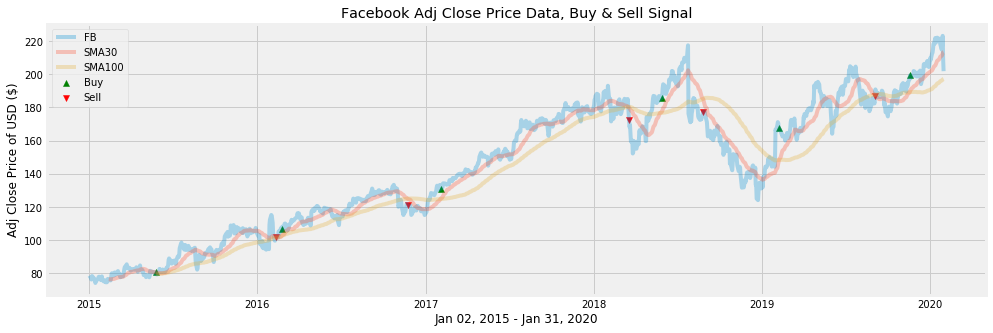

In [14]:
#visualize the final data and the strategy to buy and sell sell stock
plt.figure(figsize=(15,5))
plt.plot(data['FB'],label = 'FB', alpha = 0.30)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.30)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.30)
plt.scatter(data.index,data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index,data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Facebook Adj Close Price Data, Buy & Sell Signal')
plt.xlabel('Jan 02, 2015 - Jan 31, 2020')
plt.ylabel('Adj Close Price of USD ($)')
plt.legend(loc='upper left', fontsize=10)
plt.show()

This is the implementation of a traditional simple moving average(SMA) cross-over strategy. This strategy generates a buy signal when a fast moving average(30 days) crossover a slow moving averag (100 days) and generates a sell signal when a fast moving average(30 days) cross-under a slow moving average(100 days).

Out of the 5 signals generated, this strategy was profitable on 4 occasions. However, this strategy needs to be backtested on more data and needs to be optimized further. Feel free to download or fork this notebook to make your algorithmic trading strategy. This is for educational and information purposes only. Kindly use this at your own risk.
